In [1]:
import pandas as pd
import matplotlib.pyplot as plt
happiness2015=pd.read_csv('Downloads\World_Happiness_2015.csv')
world_dev = pd.read_csv("Downloads\World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged=pd.merge(left=happiness2015,right=world_dev,how='left',left_on='Country',right_on='ShortName')
merged=merged.rename(col_renaming,axis=1)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [2]:
def extract_last_word(element):
    listwords=str(element).split()
    return listwords[-1]
merged['Currency Apply']=merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [3]:
merged['Currency Vectorized']=merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [4]:
lengths=merged['CurrencyUnit'].str.len()
value_counts=lengths.value_counts(dropna=False)
value_counts.head()

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
Name: CurrencyUnit, dtype: int64

In [5]:
pattern = r"[Nn]ational accounts"
national_accounts=merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [6]:
pattern = r"[Nn]ational accounts"

national_accounts=merged['SpecialNotes'].str.contains(pattern,na=False)
merged_national_accounts=merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [7]:
pattern =r"([1-2][0-9]{3})"
years=merged['SpecialNotes'].str.extract(pattern)
years.head(6)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999


In [8]:
years=merged['SpecialNotes'].str.extract(pattern,expand=True)

In [9]:
merged = merged.set_index('Country')
pattern = r"(?P<Years>[1-2][0-9]{3})"
years=merged['IESurvey'].str.extractall(pattern)
value_counts=years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
2002     1
2000     1
1992     1
1995     1
2003     1
2006     1
1999     1
1998     1
Name: Years, dtype: int64


In [10]:
merged['SpecialNotes'].str.extractall(pattern)

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999
...                 ...
Rwanda      1      2011
            2      2008
Togo        0      2013
            1      2000
            2      2000

[164 rows x 1 columns]

In [11]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

In [12]:
years.sort_values('Second_Year')

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10
...,...,...,...,...
Guinea,0,2012,NaN,NaN
Burkina Faso,0,2009,NaN,NaN
Afghanistan,0,2008,NaN,NaN


In [13]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years=merged['IESurvey'].str.extractall(pattern)
first_two_year=years['First_Year'].str[0:2]
years['Second_Year']=first_two_year+years['Second_Year']

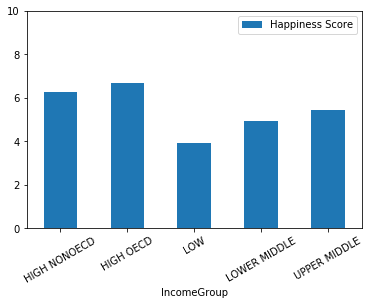

In [14]:
merged['IncomeGroup']=merged['IncomeGroup'].str.replace(' income','').str.replace(':','').str.strip().str.upper()
oi=merged['IncomeGroup']
pv_incomes=merged.pivot_table(index='IncomeGroup',values='Happiness Score')
pv_incomes.plot(kind='bar',rot=30,ylim=(0,10))
plt.show()